In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Sample non-sequential sales data
sales_data = pd.DataFrame({
    'Date': ['2021-01-01', '2021-03-01', '2021-05-01', '2021-07-01', '2021-09-01', '2021-11-01'],
    'Sales': [1000, 1200, 1500, 1400, 1600, 1800]
})

# Convert 'Date' column to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Set 'Date' column as index
sales_data.set_index('Date', inplace=True)
# Resample to monthly frequency and fill missing values with 0

In [2]:
sales_data

,Sales
Date,
2021-01-01,1000
2021-03-01,1200
2021-05-01,1500
2021-07-01,1400
2021-09-01,1600
2021-11-01,1800


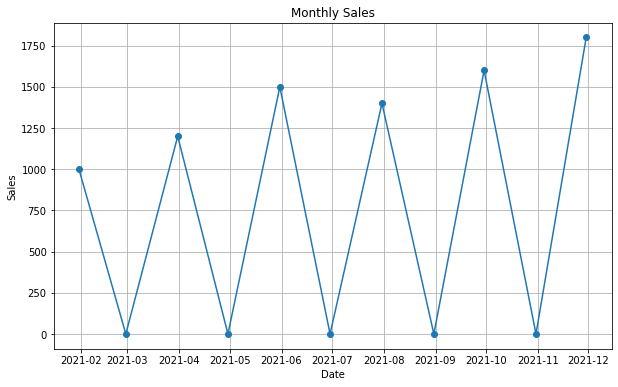

In [3]:
sales_data = sales_data.resample('M').sum().fillna(0)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(sales_data.index, sales_data['Sales'], marker='o')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()



In [4]:
sales_data['Sales']

Date
2021-01-31    1000
2021-02-28       0
2021-03-31    1200
2021-04-30       0
2021-05-31    1500
2021-06-30       0
2021-07-31    1400
2021-08-31       0
2021-09-30    1600
2021-10-31       0
2021-11-30    1800
Freq: M, Name: Sales, dtype: int64

In [5]:
# Decompose the time series into trend, seasonal, and residual components
# decomposition = seasonal_decompose(sales_data['Sales'], model='additive')
# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

In [6]:
# Plot the decomposed components
# plt.figure(figsize=(10, 8))
# plt.subplot(411)
# plt.plot(sales_data.index, sales_data['Sales'], label='Original', color='blue')
# plt.legend(loc='upper left')
# plt.subplot(412)
# plt.plot(sales_data.index, trend, label='Trend', color='red')
# plt.legend(loc='upper left')
# plt.subplot(413)
# plt.plot(sales_data.index, seasonal, label='Seasonal', color='green')
# plt.legend(loc='upper left')
# plt.subplot(414)
# plt.plot(sales_data.index, residual, label='Residual', color='purple')
# plt.legend(loc='upper left')
# plt.tight_layout()

# # Fit a Seasonal ARIMA model (SARIMA)
# model = SARIMAX(sales_data['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
# results = model.fit()

# # Forecast future sales
# forecast = results.get_forecast(steps=12)
# forecast_index = pd.date_range(start=sales_data.index[-1], periods=13, freq='M')[1:]
# forecast_values = forecast.predicted_mean

# # Plot actual vs forecasted sales
# plt.figure(figsize=(10, 6))
# plt.plot(sales_data.index, sales_data['Sales'], label='Actual', marker='o')
# plt.plot(forecast_index, forecast_values, label='Forecast', marker='o', color='red')
# plt.title('Actual vs Forecasted Sales')
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.legend()
# plt.grid(True)
# plt.show()


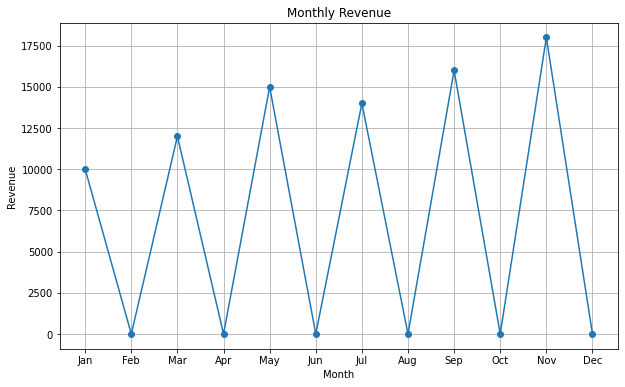

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Sample non-sequential revenue data
revenue_data = pd.DataFrame({
    'Month': ['Jan', 'Mar', 'May', 'Jul', 'Sep', 'Nov'],
    'Revenue': [10000, 12000, 15000, 14000, 16000, 18000]
})

# Convert 'Month' column to categorical to preserve order
revenue_data['Month'] = pd.Categorical(revenue_data['Month'], categories=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)

# Set 'Month' column as index
revenue_data.set_index('Month', inplace=True)

# Fill missing months with 0 revenue
revenue_data = revenue_data.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fill_value=0)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(revenue_data.index, revenue_data['Revenue'], marker='o')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# Fit an ARIMA model to the revenue data
# model = ARIMA(revenue_data['Revenue'], order=(1, 1, 1))
# results = model.fit()

# # Forecast future revenues
# forecast = results.forecast(steps=12)

# # Plot actual and forecasted revenues
# plt.figure(figsize=(10, 6))
# plt.plot(revenue_data.index, revenue_data['Revenue'], label='Actual', marker='o')
# plt.plot(pd.date_range(start=revenue_data.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast', marker='o', color='red')
# plt.title('Actual vs Forecasted Revenue')
# plt.xlabel('Month')
# plt.ylabel('Revenue')
# plt.legend()
# plt.grid(True)
# plt.show()


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Sample time series data generation
# Let's generate some synthetic time series data for this example
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
data = np.random.normal(loc=0, scale=1, size=len(dates))
ts = pd.Series(data, index=dates)
ts

2020-01-01    1.764052
2020-01-02    0.400157
2020-01-03    0.978738
2020-01-04    2.240893
2020-01-05    1.867558
                ...   
2022-12-27   -0.231102
2022-12-28   -1.638807
2022-12-29   -0.733313
2022-12-30    2.149575
2022-12-31   -0.090244
Freq: D, Length: 1096, dtype: float64

In [19]:
# ts['2020-01-30']

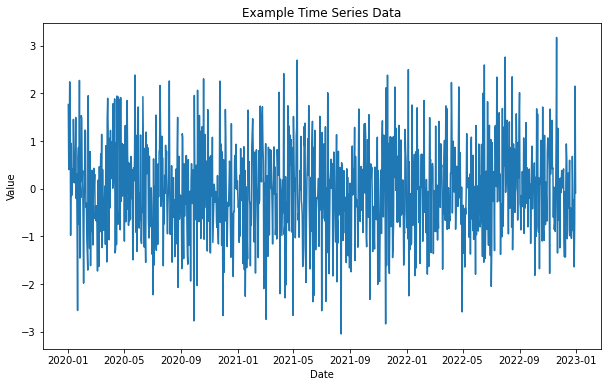

In [12]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(ts)
plt.title('Example Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

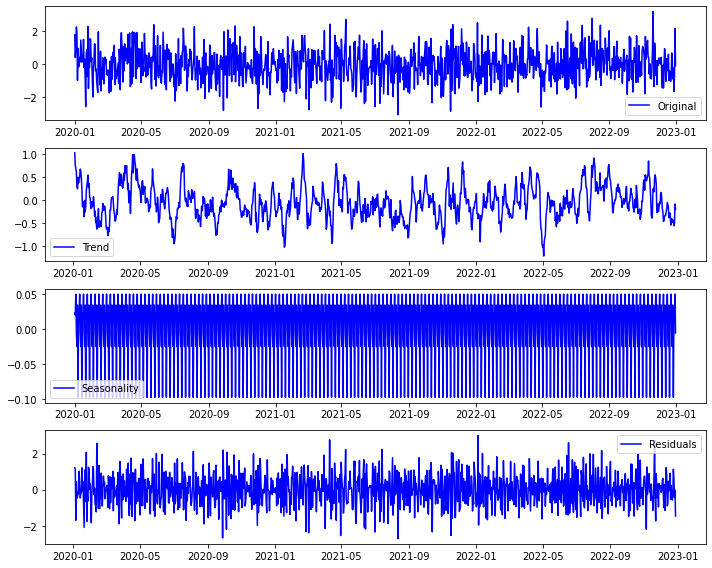

In [13]:
# Decompose the time series (optional)
# Decomposing the time series can help identify seasonality and trend
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(ts, label='Original', color='blue')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')

plt.tight_layout()

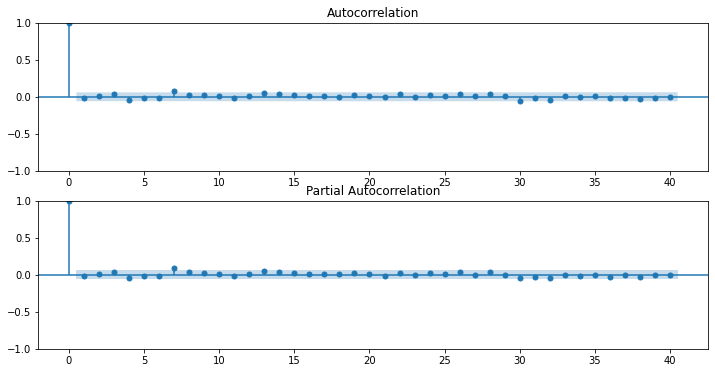

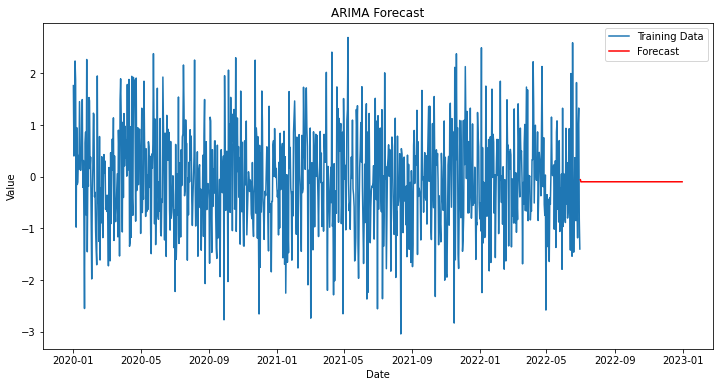

Mean Squared Error: 0.8919087791801481


In [14]:

# Plot ACF and PACF to determine ARIMA parameters
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(ts, ax=plt.gca(), lags=40)
plt.subplot(212)
plot_pacf(ts, ax=plt.gca(), lags=40)
plt.show()

# Split the data into training and testing sets
train_data = ts['2020-01-01':'2022-06-30']
test_data = ts['2022-07-01':]

# Fit ARIMA model
order = (1, 1, 1)  # Example ARIMA parameters, determined from ACF/PACF plots
model = ARIMA(train_data, order=order)
fitted_model = model.fit()

# Forecast
forecast = fitted_model.forecast(steps=len(test_data))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Evaluate the model (optional)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_data, forecast)
print(f"Mean Squared Error: {mse}")
